In [1]:
from utils_filter import *
from utils_datetime import *
from utils_geography import *
from utils_plotting import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import metpy
import numbers
import seaborn as sns
from windrose import WindroseAxes
from matplotlib.lines import Line2D

from matplotlib.backends.backend_pdf import PdfPages


In [12]:
pph = xr.open_dataset('data/pph/labelled_pph.nc')
all_pph_dates = pph['time']
pph_dates = all_pph_dates[all_pph_dates <= '202312310000']
pph_dates = pph_dates[pph_dates >= '198701160000']
pph = pph.sel(time = pph_dates)
# TODO: function to drop unwanted pph dates

In [13]:
missing_dates = ['200204250000', '200208300000', '200304150000', '200304160000', '200306250000', '200307270000', '200307280000', '200312280000', '200404140000', '200408090000', '200905280000', '201105210000', '202005240000']


In [4]:
label_names = ['MAX_CAT', 'RAMP_CAT', 'SEASON', 'RAMP_UP', 'RAMP_DOWN', 
               'PPH_D_NUM',
               'REPORT_NUM', 'TOR_NUM', 'WIND_NUM', 'HAIL_NUM', 
               'TOR_F', 'WINDSP_NUM', 'HAILSZ_NUM', 
               'BS_NUM', 'NEIGH_NUM', 'RMSE_NUM',
               'POD_NUM', 'FAR_NUM',
               'POD_H_NUM', 'FAR_H_NUM',
               'POD_W_NUM', 'FAR_W_NUM',
               'POD_T_NUM', 'FAR_T_NUM',
               'E_SH_NUM', 'E_SH_H_NUM', 'E_SH_W_NUM', 'E_SH_T_NUM',
               'N_SH_NUM', 'N_SH_H_NUM', 'N_SH_W_NUM', 'N_SH_T_NUM',
               'DIV_NUM', 'DIV_H_NUM', 'DIV_W_NUM', 'DIV_T_NUM',
               'CSI_NUM', 'CSI_W_NUM', 'CSI_H_NUM', 'CSI_T_NUM'
               ]

category_dict = {
    'NONE' : -1,
    'TSTM': 0,
    'MRGL': 1,
    'SLGT': 2,
    'ENH': 3,
    'MDT': 4,
    'HIGH': 5
}

ramp_dict = {
    'up': 0,
    'down': 1,
    'both': 2,
    'neither': 3
}

season_dict = {
    'Winter': 0,
    'Spring': 1,
    'Summer': 2,
    'Fall': 3
}

region_dict = {
    'NONE': -1,
    'West': 0,
    'Great Plains': 1,
    'Midwest': 2,
    'Northeast': 3,
    'South': 4
}

ramp_up_dict = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6
}

ramp_down_dict = {
    '0': 0,
    '-1': 1,
    '-2': 2,
    '-3': 3,
    '-4': 4,
    '-5': 5,
    '-6': 6
}

pph_dict = {
    'ZERO': 0,
    'TSTM': 1,
    'MRGL': 2,
    'SLGT': 3,
    'ENH': 4,
    'MDT': 5,
    'HIGH': 6
}

tor_dict = {
    'NONE': -1,
    'EFU': 0,
    '(E)F0': 1,
    '(E)F1': 2,
    '(E)F2': 3,
    '(E)F3': 4,
    '(E)F4': 5,
    '(E)F5': 6
}

dicts = [category_dict, ramp_dict, season_dict,  ramp_up_dict, ramp_down_dict, 
         None, 
         None, None, None, None, 
         tor_dict, None, None,
         None, None, None,
         None, None,
         None, None,
         None, None,
         None, None,
         None, None, None, None,
         None, None, None, None,
         None, None, None, None, 
         None, None, None, None] 

steps = [1, 1, 1,  1, 1, 
         10, 
         100, 25, 100, 50, 
         1, 10, 1, 
         .0025, .001, .01,
         .05, .1, 
         .05, .1,
         .05, .1,
         .05, .1,
         100000, 100000, 100000, 100000,
         100000, 100000, 100000, 100000,
         .5, .5, .5, .5,
         .02, .02, .02, .02
         ]

written_labels = ['Categorical Risk', 'Ramp', 'Season', 'Ramp Up', 'Ramp Down', 
                  'Max PPH',
                  'Total Storm Reports', 'Tornado Reports', 'Wind Reports', 'Hail Reports',
                  'Max Tornado Rating', 'Max Wind Speed (kt)', 'Max Hail Size (in)',
                  'Brier Score', 'Neighborhood Brier Score', 'RMSE',
                  'Probability of Detection', 'False Alarm Ratio',
                  'Hail Probability of Detection', 'Hail False Alarm Ratio',
                  'Wind Probability of Detection', 'Wind False Alarm Ratio',
                  'Tornado Probability of Detection', 'Tornado False Alarm Ratio',
                  'East Shift', 'Hail East Shift', 'Wind East Shift', 'Tornado East Shift',
                  'North Shift', 'Hail North Shift', 'Wind North Shift', 'Tornado North Shift',
                  'Divergence', 'Hail Divergence', 'Wind Divergence', 'Tornado Divergence',
                  'Critical Success Index', 'Wind Critical Success Index', 'Hail Critical Success Index', 'Tornado Critical Success Index'
                  ]


In [ ]:
def plot_distribution(pph, label_name, label_dict, written_label, titlestring, save_location, bins = 20, show=False):
    if label_dict == None:
        plt.hist(pph[label_name].values, bins = bins)
    else:
        labels = pph[label_name]
        label_counts = labels.groupby(labels).count()
        def sort_order(key):
            return label_dict[str(key[0])]
        sorted_labels, sorted_counts = zip(*sorted(zip(list(label_counts[label_name].values), label_counts.values), key = sort_order))
        plt.bar(sorted_labels, sorted_counts)  
    plt.xlabel(written_label)
    plt.title('Number of ' + titlestring + ' Days With Each '  + written_label)
    plt.ylabel("Number of Days")
    if save_location != None:
        plt.savefig(save_location + '/' + written_label + '_distribution.png')
    if show:
        plt.show()
    plt.close()

In [ ]:
plot_distribution(pph, 'MAX_CAT', category_dict, 'CSI', '', None, show = True)

In [ ]:
def plot_distribution_2d(pph, label_1, label_2, label_1_string, label_2_string, dict_1, dict_2, titlestring, save_location, show=False, defaultbins = 10, step_1 = 1, step_2 = 1):
# plot 2d heatmap for any 2 labels

    data1 = []
    data2 = []

    for i in range(len(pph[label_1])):
        if dict_1 != None:
            data1.append(dict_1[str(pph[label_1].values[i])])
        else: 
            data1.append(pph[label_1].values[i])
        if dict_2 != None:
            data2.append(dict_2[str(pph[label_2].values[i])])
        else:
            data2.append(pph[label_2].values[i])

    
    if dict_1 != None:
        max1 = max(dict_1.values())
        min1 = min(dict_1.values())
        bins1 = np.linspace(min1-.5, max1+.5, 2+max1-min1)
        irange = bins1.size-1

    else:
        if ((max(data1) - min(data1))/step_1).is_integer():
            m = 2
        else: 
            m = 1
            
        if min(data1) < 0:
            bins1 = np.arange(step_1 * round(min(data1)/step_1), max(data1)+m*step_1, step_1)
        else:
            bins1 = np.insert(np.arange(step_1 * round(min(data1)/step_1), max(data1)+m*step_1, step_1), 0, 0)
        
            if isinstance(data1[1], numbers.Integral):
                bins1[1] = bins1[1] + 1
            else:
                bins1[1] = bins1[1] + .00000000001
        num_bins1 = len(bins1)-1
        irange = num_bins1

    if dict_2 != None:
        max2 = max(dict_2.values())
        min2 = min(dict_2.values())
        bins2 = np.linspace(min2-.5, max2+.5, 2+max2-min2)
        jrange = bins2.size-1
    else:
        if ((max(data2) - min(data2))/step_2).is_integer():
            m = 2
        else: 
            m = 1

        if min(data2) < 0:
            bins2 = np.arange(step_2 * round(min(data2)/step_2), max(data2)+m*step_2, step_2)
        else:
            bins2 = np.insert(np.arange(step_2 * round(min(data2)/step_2), max(data2)+m*step_2, step_2), 0, 0)

            if isinstance(data2[1], numbers.Integral):
                bins2[1] = bins2[1] + 1
            else:
                bins2[1] = bins2[1] + .00000000001
        num_bins2 = len(bins2)-1
        jrange = num_bins2

    heatmap = np.histogram2d(data1, data2, bins = (bins1, bins2))
    im = plt.imshow(heatmap[0],  norm=colors.LogNorm())
    plt.colorbar(im)

    for i in range(irange): 
        for j in range(jrange): 
            plt.annotate(str(int(heatmap[0][i][j])), xy=(j, i), 
                        ha='center', va='center', color='black') 

    if dict_1 != None:
        plt.yticks(range(len(list(dict_1.values()))), labels=list(dict_1.keys()))
    else:
        labels = [s + '+' for s in heatmap[1][range(num_bins1)].astype(str)]
        if min(data1) >= 0:
            labels[0] = '0'
            if isinstance(data1[1], numbers.Integral):
                labels[1] = '1+'
            else:
                labels[1] = '0+'
        plt.yticks(range(num_bins1), labels = labels) 
        plt.yticks(fontsize=8)
    if dict_2 != None:
        plt.xticks(range(len(list(dict_2.values()))), labels=list(dict_2.keys()))
    else:
        labels = [s + '+' for s in heatmap[2][range(num_bins2)].astype(str)]
        if min(data2) >= 0:
            labels[0] = '0'
            if isinstance(data2[1], numbers.Integral):
                labels[1] = '1+'
            else:
                labels[1] = '0+'
        plt.xticks(range(num_bins2), labels = labels)
        plt.xticks(fontsize=8)

    plt.ylabel(label_1_string)
    plt.xlabel(label_2_string)

    plt.title("Number of " + titlestring + " Days with each Combination of " + label_1_string + " and " +  label_2_string)
    if save_location != None:
        plt.savefig(save_location + '/' + label_1_string + '_' + label_2_string + '_distribution.png')
    if show:
        plt.show()
    plt.close()

In [ ]:
plot_distribution_2d(pph, 'N_SH_NUM', 'E_SH_NUM', 'North Shift', 'East Shift', None, None, '', None, show = True, step_1 = 100000, step_2 = 100000)

In [14]:
# This makes the next steps work properly for some reason
for k in list(pph.keys()):
    pph[k].values

pph = pph.sel(time=~pph['time'].isin(missing_dates))

# moderate and up days only:
all_pph_dates = pph['time']
mdt_pph_dates = all_pph_dates[pph['MAX_CAT'].isin(['MDT', 'HIGH'])]
mdt_pph = pph.sel(time = mdt_pph_dates)
mdt_pph = mdt_pph.sel(time=~mdt_pph['time'].isin(missing_dates))

slgt_pph_dates = all_pph_dates[pph['MAX_CAT'].isin(['SLGT', 'ENH', 'MDT', 'HIGH'])]
slgt_pph = pph.sel(time = slgt_pph_dates)
slgt_pph = slgt_pph.sel(time=~slgt_pph['time'].isin(missing_dates))

# dates since new categorical system 
new_cutoff = '201410230000'
new_pph_dates = all_pph_dates[all_pph_dates >= new_cutoff]
new_pph = pph.sel(time = new_pph_dates)
new_pph = new_pph.sel(time=~new_pph['time'].isin(missing_dates))

# Moderate dates in new system
mdt_new_pph_dates = mdt_pph_dates[mdt_pph_dates >= new_cutoff]
mdt_new_pph = pph.sel(time = mdt_new_pph_dates)
mdt_new_pph = mdt_new_pph.sel(time=~mdt_new_pph['time'].isin(missing_dates))


# dates since day 3 added
day3_cutoff = '200203300000'
day3_pph_dates = all_pph_dates[all_pph_dates >= day3_cutoff]
day3_pph = pph.sel(time = day3_pph_dates)
day3_pph = day3_pph.sel(time=~day3_pph['time'].isin(missing_dates))

# Moderate dates since day 3 added
mdt_day3_pph_dates = mdt_pph_dates[mdt_pph_dates >= day3_cutoff]
mdt_day3_pph = pph.sel(time = mdt_day3_pph_dates)
mdt_day3_pph = mdt_day3_pph.sel(time=~mdt_day3_pph['time'].isin(missing_dates))

slgt_day3_pph_dates = slgt_pph_dates[slgt_pph_dates >= day3_cutoff]
slgt_day3_pph = pph.sel(time = slgt_day3_pph_dates)
slgt_day3_pph = slgt_day3_pph.sel(time=~slgt_day3_pph['time'].isin(missing_dates))


# dates since early day 2 added
day21_cutoff = '199707100000'
day21_pph_dates = all_pph_dates[all_pph_dates >= day21_cutoff]
day21_pph = pph.sel(time = day21_pph_dates)
day21_pph = day21_pph.sel(time=~day21_pph['time'].isin(missing_dates))


# Moderate dates since early day 2 added
mdt_day21_pph_dates = mdt_pph_dates[mdt_pph_dates >= day21_cutoff]
mdt_day21_pph = pph.sel(time = mdt_day21_pph_dates)
mdt_day21_pph = mdt_day21_pph.sel(time=~mdt_day21_pph['time'].isin(missing_dates))


# dates since late day 2 added
day22_cutoff = '199504040000'
day22_pph_dates = all_pph_dates[all_pph_dates >= day22_cutoff]
day22_pph = pph.sel(time = day22_pph_dates)
day22_pph = day22_pph.sel(time=~day22_pph['time'].isin(missing_dates))

# Moderate since late day 2 added
mdt_day22_pph_dates = mdt_pph_dates[mdt_pph_dates >= day22_cutoff]
mdt_day22_pph = pph.sel(time = mdt_day22_pph_dates)
mdt_day22_pph = mdt_day22_pph.sel(time=~mdt_day22_pph['time'].isin(missing_dates))



In [ ]:
def make_plots(pph, label_names, dicts, written_labels, shortstring, titlestring, show=False):
    
    for i in range(len(written_labels)):
        plot_distribution(pph, label_names[i], dicts[i], written_labels[i], titlestring, 'plots/label_distributions/'+ shortstring+'/1d/', show=show)

    for i in range(len(label_names)):
        for j in range(i):
            plot_distribution_2d(pph, label_names[i], label_names[j], written_labels[i], written_labels[j], dicts[i], dicts[j], titlestring, 'plots/label_distributions/'+ shortstring+'/2d/', show=show, step_1 = steps[i], step_2 = steps[j])

In [ ]:
#make_plots(pph, label_names, dicts, written_labels, 'all', 'All')
#make_plots(mdt_pph, label_names, dicts, written_labels, 'mdt', 'Moderate')

#make_plots(new_pph, label_names, dicts, written_labels, 'new', 'New')
#make_plots(mdt_new_pph, label_names, dicts, written_labels, 'mdt_new', 'Moderate New')

make_plots(day3_pph, label_names, dicts, written_labels, 'day3', 'Since 2002')
#make_plots(mdt_day3_pph, label_names, dicts, written_labels, 'mdt_day3', 'Moderate Since 2002')

#make_plots(day21_pph, label_names, dicts, written_labels, 'day21', 'Since 1997')
#make_plots(mdt_day21_pph, label_names, dicts, written_labels, 'mdt_day21', 'Moderate Since 1997')

#make_plots(day22_pph, label_names, dicts, written_labels, 'day22', 'Since 1995')
#make_plots(mdt_day22_pph, label_names, dicts, written_labels, 'mdt_day22', 'Moderate Since 1995')


# Timeseries

Not good for contingency metrics since all days weighted equally

In [ ]:
def plot_timeseries_2(pph, vars_of_interest, var_names, save = True, save_location = 'plots/timeseries', show = True):
    p = pph.sel(time = slice('200203300000', '202312310000'))
    times = pd.to_datetime(p['time'].astype(str), format='%Y%m%d%H%M')

    rolling = 365
    half_rolling_1 = int(np.floor(rolling/2))
    half_rolling_2 = rolling - half_rolling_1 - 1

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    ax1.plot(times[half_rolling_1:-half_rolling_2], np.convolve(p[vars_of_interest[0]].data, np.ones(rolling)/rolling, 'valid'))
    ax2.plot(times[half_rolling_1:-half_rolling_2], np.convolve(p[vars_of_interest[1]].data, np.ones(rolling)/rolling, 'valid'), color = 'r')
    ax1.set_ylabel(var_names[0])
    ax2.set_ylabel(var_names[1])
    ax1.set_xlabel('Centered Time')
    plt.title(var_names[0] + ' and ' + var_names[1] + ' 1-Year Running Mean Since 2002')
    fig.legend(var_names)
    fig.tight_layout() 

    if save:
        plt.savefig(save_location + '/timeseries_' + var_names[0] + var_names[1] + '.png')
    if show:
        plt.show()

def plot_timeseries_n(pph, vars_of_interest, var_names, mod_name, ylabel, rolling, colors = None, save = True, save_location = 'plots/timeseries', show = True):
    p = pph.sel(time = slice('200203300000', '202312310000'))
    times = pd.to_datetime(p['time'].astype(str), format='%Y%m%d%H%M')

    half_rolling_1 = np.floor(rolling/2)
    half_rolling_2 = rolling - half_rolling_1 - 1

    for i, var in enumerate(vars_of_interest):
        if colors == None:
            c = None
        else:
            c = colors[i]
        plt.plot(times[int(half_rolling_1[i]):-int(half_rolling_2[i])], np.convolve(p[var].data, np.ones(rolling[i])/rolling[i], 'valid'), c = c)
    
    plt.xlabel('Centered Time')
    plt.ylabel(ylabel)
    plt.title(ylabel + ' 1-Year Running Mean Since 2002')
    plt.legend(var_names)
    plt.tight_layout() 
    
    if save:
        plt.savefig(save_location + '/timeseries_' + mod_name + '.png')

    if show:
        plt.show()



In [ ]:
var_lists_2 = [['POD_NUM', 'FAR_NUM'],
             ['RAMP_UP', 'RAMP_DOWN'],
             ['POD_W_NUM', 'FAR_W_NUM'],
             ['POD_H_NUM', 'FAR_H_NUM'],
             ['POD_T_NUM', 'FAR_T_NUM']]

name_lists_2 = [['Probability of Detection', 'False Alarm Ratio'],
             ['Ramp Up', 'Ramp Down'],
             ['Wind POD', 'Wind FAR'],
             ['Hail POD', 'Hail FAR'],
             ['Tornado POD', 'Tornado FAR']]



for var, names in zip(var_lists_2, name_lists_2):
    plot_timeseries_2(pph, var, names)

In [ ]:
var_lists_n = [['REPORT_NUM', 'WIND_NUM', 'HAIL_NUM', 'TOR_NUM'],
               ['PPH_D_NUM', 'PPH_NUM'],
               ['POD_NUM', 'POD_W_NUM', 'POD_H_NUM', 'POD_T_NUM'],
               ['FAR_NUM', 'FAR_W_NUM', 'FAR_H_NUM', 'FAR_T_NUM'],
               ['DIV_NUM', 'DIV_W_NUM', 'DIV_H_NUM', 'DIV_T_NUM'],
               ['E_SH_NUM', 'E_SH_W_NUM', 'E_SH_H_NUM', 'E_SH_T_NUM'],
               ['N_SH_NUM', 'N_SH_W_NUM', 'N_SH_H_NUM', 'N_SH_T_NUM'],
               ['CSI_NUM', 'CSI_W_NUM', 'CSI_H_NUM', 'CSI_T_NUM'],
               ['FAR_NUM', 'FAR_NUM'],
               ['POD_NUM', 'POD_NUM'],
               ['CSI_NUM', 'CSI_NUM']
]

name_lists_n = [['Total', 'Wind', 'Hail', 'Tornado'],
                ['Dependent Hazards', 'Independent Hazards'],
                ['POD', 'Wind POD', 'Hail POD', 'Tornado POD'],
                ['FAR', 'Wind FAR', 'Hail FAR', 'Tornado FAR'],
                ['Divergence', 'Wind Divergence', 'Hail Divergence', 'Tornado Divergence'],
                ['East Shift', 'Wind East Shift', 'Hail East Shift', 'Tornado East Shift'],
                ['North Shift', 'Wind North Shift', 'Hail North Shift', 'Tornado North Shift'],
                ['CSI', 'Wind CSI', 'Hail CSI', 'Tornado CSI'],
                ['1-year', '3-month'],
                ['1-year', '3-month'],
                ['1-year', '3-month']
]

rolling = [np.array([365, 365, 365, 365]),
           np.array([365, 365]),
           np.array([365, 365, 365, 365]),
           np.array([365, 365, 365, 365]),
           np.array([365, 365, 365, 365]),
           np.array([365, 365, 365, 365]),
           np.array([365, 365, 365, 365]),
           np.array([365, 365, 365, 365]),
           np.array([365, 91]),
           np.array([365, 91]),
           np.array([365, 91])]

hazard_colors = ['black', 'blue', 'green', 'red']
bw_colors = ['black', 'grey']

colors = [hazard_colors, None, hazard_colors, hazard_colors, hazard_colors, hazard_colors, hazard_colors, hazard_colors, bw_colors, bw_colors, bw_colors]

mod_names = ['reports', 'pph', 'hazard_pod', 'hazard_far', 'hazard_div', 'hazard_e_shift', 'hazard_n_shift', 'hazard_csi', 'far', 'pod', 'csi']

axis_names = ['Daily Storm Reports', 'Daily Max PPH', 'Probability of Detection', 'False Alarm Ratio', 'Divergence', 'East Shift (m)', 'North Shift (m)', 'Critical Success Index',  'False Alarm Ratio', 'Probability of Detection', 'Critical Success Index']

for var, names, mod_name, axis_name, r, color in zip(var_lists_n, name_lists_n, mod_names, axis_names, rolling, colors):
    print(var, names, mod_name, axis_name, r, color)
    plot_timeseries_n(pph, var, names, mod_name, axis_name, r, color)

In [15]:
grid_outlook_location = 'data/outlooks/grid_outlooks.nc'
grid_outlooks = xr.open_dataset(grid_outlook_location)
g = grid_outlooks.sel(time = slice('200203300000', '202312310000'))
times = pd.to_datetime(g['time'].astype(str), format='%Y%m%d%H%M')
rolling = 365
half_rolling_1 = int(np.floor(rolling/2))
half_rolling_2 = rolling - half_rolling_1 - 1

In [ ]:
plt.plot(times[half_rolling_1:-half_rolling_2], np.convolve(g['prob'].sel(outlook = 'Day 1').max(dim=['x', 'y']).data, np.ones(rolling)/rolling, 'valid'))
plt.plot(times[half_rolling_1:-half_rolling_2], np.convolve(g['prob'].sel(outlook = 'Day 2 17').max(dim=['x', 'y']).data, np.ones(rolling)/rolling, 'valid'))
plt.plot(times[half_rolling_1:-half_rolling_2], np.convolve(g['prob'].sel(outlook = 'Day 2 7').max(dim=['x', 'y']).data, np.ones(rolling)/rolling, 'valid'))
plt.plot(times[half_rolling_1:-half_rolling_2], np.convolve(g['prob'].sel(outlook = 'Day 3').max(dim=['x', 'y']).data, np.ones(rolling)/rolling, 'valid'))
plt.legend(['Day 1', 'Day 2 17z', 'Day 2 7z', 'Day 3'])

plt.title('Daily Maximum Any-Hazard Probability Over Time')

plt.ylabel('1-year Running Mean Daily Maximum Any-Hazard Probability')
plt.xlabel('Centered Time')    
plt.savefig('plots/timeseries/prob_over_time.png')


In [ ]:
displacements = xr.load_dataset('data/displacement/displacements.nc')
displacements.sel(time = '201905200000')

In [ ]:
pph.sel(time = '201905200000')

In [ ]:
mdt_day3_pph

# Displacement Histograms

In [ ]:
def stacked_histogram(pph, var_of_interest, var_stack, xlabel, titlestring, legend_title, save_location, bins = 40, show=False, save = True):
    
    plot_arrays = []

    all_var_of_interest = pph[var_of_interest]

    all_var_stack = pph[var_stack]
    stack_values = list(set(all_var_stack.values))

    if 'Northeast' in stack_values:
        stack_values = ['West', 'Great Plains', 'Midwest', 'South', 'Northeast']

    if 'Winter' in stack_values:
        stack_values = ['Winter', 'Spring', 'Summer', 'Fall']

    for stack_value in stack_values:

        plot_arrays.append(all_var_of_interest[all_var_stack == stack_value]/1000)

    cmap = plt.get_cmap('Purples')
    colors = [cmap(.25 + i *.75 / len(plot_arrays)) for i in range(len(plot_arrays))]

    y, _, _ = plt.hist(plot_arrays, bins, stacked=True, label = stack_values, color = colors, range = (-800, 800))
    plt.plot([0, 0], [0, y.max()], color='k', linestyle='-')
    plt.xlabel(xlabel)
    plt.title(titlestring, fontsize = 10)
    plt.legend(title = legend_title)

    if save:
        plt.savefig(save_location)
    if show:
        plt.show()



stacked_histogram(mdt_day3_pph, 'E_SH_W_NUM', 'REGION_M', 'Eastward Displacement (km)', 'Wind Eastward Optical Flow Displacement on MDT+ Days 2002-2023, by Region', 'Region', 'plots/results/wind_displacement.png', show = True, save = True)
stacked_histogram(mdt_day3_pph, 'E_SH_H_NUM', 'SEASON', 'Eastward Displacement (km)', 'Hail Eastward Optical Flow Displacement on MDT+ Days 2002-2023, by Season', 'Season', 'plots/results/hail_displacement.png', show = True, save = True)
stacked_histogram(mdt_day3_pph, 'E_SH_W_NUM', 'SEASON', 'Eastward Displacement (km)', 'Wind Eastward Optical Flow Displacement on MDT+ Days 2002-2023, by Season', 'Season', 'plots/results/wind_displacement_season.png', show = True, save = True)
stacked_histogram(mdt_day3_pph, 'E_SH_H_NUM', 'REGION_M', 'Eastward Displacement (km)', 'Hail Eastward Optical Flow Displacement on MDT+ Days 2002-2023, by Region', 'Region', 'plots/results/hail_displacement_region.png', show = True, save = True)

stacked_histogram(mdt_day3_pph, 'E_SH_T_NUM', 'REGION_M', 'Eastward Displacement (km)', 'Tornado Eastward Optical Flow Displacement on MDT+ Days 2002-2023, by Region', 'Region', 'plots/results/tor_displacement.png', show = True, save = True)
stacked_histogram(mdt_day3_pph, 'E_SH_NUM', 'REGION_M', 'Eastward Displacement (km)', 'All-Hazard Eastward Optical Flow Displacement on MDT+ Days 2002-2023, by Region', 'Region', 'plots/results/ah_displacement.png', show = True, save = True)

stacked_histogram(slgt_day3_pph, 'E_SH_W_NUM', 'REGION_M', 'Eastward Displacement (km)', 'Wind Eastward Optical Flow Displacement on SLGT+ Days 2002-2023, by Region', 'Region', 'plots/results/slgt_wind_displacement.png', show = True, save = True)
stacked_histogram(slgt_day3_pph, 'E_SH_H_NUM', 'SEASON', 'Eastward Displacement (km)', 'Hail Eastward Optical Flow Displacement on SLGT+ Days 2002-2023, by Season', 'Season', 'plots/results/slgt_hail_displacement.png', show = True, save = True)

stacked_histogram(slgt_day3_pph, 'E_SH_T_NUM', 'REGION_M', 'Eastward Displacement (km)', 'Tornado Eastward Optical Flow Displacement on SLGT+ Days 2002-2023, by Region', 'Region', 'plots/results/slgt_tor_displacement.png', show = True, save = True)
stacked_histogram(slgt_day3_pph, 'E_SH_NUM', 'REGION_M', 'Eastward Displacement (km)', 'All-Hazard Eastward Optical Flow Displacement on SLGT+ Days 2002-2023, by Region', 'Region', 'plots/results/slgt_ah_displacement.png', show = True, save = True)




In [ ]:
stacked_histogram(mdt_day3_pph, 'EW_S_NUM', 'REGION_M', 'Eastward Displacement (km)', 'Eastward Optical Flow Displacement in Western Halves of MDT+ Days 2002-2023, by Region', 'Region', 'plots/results/colocated/west_displacement.png', show = True, save = True)
stacked_histogram(mdt_day3_pph, 'EE_S_NUM', 'REGION_M', 'Eastward Displacement (km)', 'Eastward Optical Flow Displacement in Eastern Halves of MDT+ Days 2002-2023, by Region', 'Region', 'plots/results/colocated/east_displacement.png', show = True, save = True)
stacked_histogram(mdt_day3_pph, 'EW_S_W_NUM', 'REGION_M', 'Eastward Displacement (km)', 'Wind Eastward Optical Flow Displacement in Western Halves of MDT+ Days 2002-2023, by Region', 'Region', 'plots/results/colocated/wind_west_displacement.png', show = True, save = True)
stacked_histogram(mdt_day3_pph, 'EE_S_W_NUM', 'REGION_M', 'Eastward Displacement (km)', 'Wind Eastward Optical Flow Displacement in Eastern Halves of MDT+ Days 2002-2023, by Region', 'Region', 'plots/results/colocated/wind_east_displacement.png', show = True, save = True)
stacked_histogram(mdt_day3_pph, 'EW_S_H_NUM', 'REGION_M', 'Eastward Displacement (km)', 'Hail Eastward Optical Flow Displacement in Western Halves of MDT+ Days 2002-2023, by Region', 'Region', 'plots/results/colocated/hail_west_displacement.png', show = True, save = True)
stacked_histogram(mdt_day3_pph, 'EE_S_H_NUM', 'REGION_M', 'Eastward Displacement (km)', 'Hail Eastward Optical Flow Displacement in Eastern Halves of MDT+ Days 2002-2023, by Region', 'Region', 'plots/results/colocated/hail_east_displacement.png', show = True, save = True)
stacked_histogram(mdt_day3_pph, 'EW_S_T_NUM', 'REGION_M', 'Eastward Displacement (km)', 'Tornado Eastward Optical Flow Displacement in Western Halves of MDT+ Days 2002-2023, by Region', 'Region', 'plots/results/colocated/tor_west_displacement.png', show = True, save = True)
stacked_histogram(mdt_day3_pph, 'EE_S_T_NUM', 'REGION_M', 'Eastward Displacement (km)', 'Tornado Eastward Optical Flow Displacement in Eastern Halves of MDT+ Days 2002-2023, by Region', 'Region', 'plots/results/colocated/tor_east_displacement.png', show = True, save = True)


## Displacement Rose

In [ ]:
def displacement_rose(pph, hazard, hazard_name, save_location, year1, year2, scale = 45, show=False, save = True, ax = None):
    
    if ax == None:
        ax = WindroseAxes.from_ax()
        own_fig = True
    else:
        own_fig = False

    angles_rad = np.arctan2(pph['N_SH' + hazard + '_NUM'], pph['E_SH' + hazard + '_NUM'])
    angles_deg = np.degrees(angles_rad)
    wd = (90-angles_deg) % 360
    ws = np.sqrt(np.square(pph['N_SH' + hazard + '_NUM']/1000) + np.square(pph['E_SH' + hazard + '_NUM']/1000))

    ax.contourf(wd, ws, bins=np.arange(0, 600, 100))
    ax.set_ylim(0, scale)
    ax.set_yticks(np.arange(0, scale, step=5))
    ax.set_yticklabels([str(tick) for tick in np.arange(0, scale, step=5)])

    ax.set_legend()
    if own_fig:
        ax.set_title(hazard_name + ' Optical Flow Displacement Distribution Rose on MDT+ Days ' + year1 + '-' + year2)
    else:
        ax.set_title(hazard_name)
    
    if own_fig:
        if save:
            plt.savefig(save_location)
        
displacement_rose(mdt_day3_pph, '', 'All-Hazard', 'plots/results/ah_displacement_rose.png', '2002', '2023', show = True, save = False)

In [ ]:
time_periods = ['all', '2002_2006', '2007_2011', '2012_2016', '2017_2023']
hazard_names = ['All-Hazard', 'Wind', 'Hail', 'Tornado']
hazard_keys = ['', '_W', '_H', '_T']
hazard_strings = ['ah', 'wind', 'hail', 'tor']
letters = ['a', 'b', 'c', 'd']

save = True
show = True

for time_period in time_periods:
    if time_period == 'all':
        year1 = '2002'
        year2 = '2023'
        this_pph = mdt_day3_pph
        scale = 45
    else:
        year1 = time_period.split('_')[0]
        year2 = time_period.split('_')[1]
        this_pph = mdt_day3_pph.sel(time = slice(year1 + '01010000', year2 + '12312359'))
        scale = 20

    fig_rose, axs_rose = plt.subplots(2, 2, figsize=(20, 20), subplot_kw={'projection': 'windrose'})

    for i, (hazard_name, hazard_key, hazard_string, letter) in enumerate(zip(hazard_names, hazard_keys, hazard_strings, letters)):
        row, col = divmod(i, 2)
        displacement_rose(this_pph, hazard_key, hazard_name, 'plots/results/' + hazard_string + '_displacement_rose_' + time_period + '.png', year1, year2, scale = scale, show = show, save = save)
        displacement_rose(this_pph, hazard_key, hazard_name, 'plots/results/' + hazard_string + '_displacement_rose_' + time_period + '.png', year1, year2, scale = scale, show = show, save = save, ax = axs_rose[row, col])
        axs_rose[row, col].text(0.02, 0.98, letter, transform=axs_rose[row, col].transAxes,
                        fontsize=14, fontweight='bold', va='top', ha='left', color='black')
        
    fig_rose.suptitle('Optical Flow Displacement Distribution Rose on MDT+ Days ' + year1 + '-' + year2, fontsize = 16, fontweight = 'bold')
    fig_rose.subplots_adjust(hspace=.2, wspace=.2)
    if save:
        fig_rose.savefig('plots/results/displacement_roses_' + time_period + '.pdf', bbox_inches='tight')
    if show:
        plt.show()
    

## Mean Outlook and PPH Probability over time

In [21]:
pph_full_mask = ~day3_pph['time'].isin(missing_dates)
outlooks_full_mask = (grid_outlooks['time'] > min(pph['time'])) & ~grid_outlooks['time'].isin(missing_dates)
conus_mask = np.load('conus_mask.npy', allow_pickle=True)

pph_var_dict = {' Wind': 'p_perfect_wind',
                ' Hail': 'p_perfect_hail',
                ' Tornado': 'p_perfect_tor',
                '': 'p_perfect_totalsvr'
                }

mask = (pph_full_mask, outlooks_full_mask)
# apply conus mask in below plots
conus_mask = np.load('conus_mask.npy', allow_pickle=True)
regions = ['CONUS', 'Great Plains', 'Midwest', 'Northeast', 'South', 'West']

for region in regions:

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    labels = ['a', 'b', 'c', 'd']
    hazards = ['', ' Wind', ' Hail', ' Tornado']


    if region == 'CONUS':
                # Create a boolean mask where conus_mask is a string
                valid_points_mask = np.vectorize(lambda x: isinstance(x, str))(conus_mask)
    else:
        valid_points_mask = conus_mask == region

    for i, hazard in enumerate(hazards):
        print(hazard)
        outlook_probs = []
        pph_probs = []

        
        
        for year in range(2002, 2024):
            this_pph = day3_pph.sel(time=mask[0])[pph_var_dict[hazard]]
            this_pph = this_pph.sel(time=this_pph.time.str.startswith(str(year)))
            this_outlook = grid_outlooks.sel(time=mask[1], outlook='Day 1' + hazard)['prob']
            this_outlook = this_outlook.sel(time=this_outlook.time.str.startswith(str(year)))

            

            # Match shape to data for filtering
            valid_points_mask_outlooks = np.broadcast_to(np.expand_dims(valid_points_mask, axis=0), this_outlook.shape)
            valid_points_mask_pph = np.broadcast_to(np.expand_dims(valid_points_mask, axis=0), this_pph.shape)

            # Filter and flatten data
            this_outlook_vals = this_outlook.values[valid_points_mask_outlooks].flatten()
            this_pph_vals = this_pph.values[valid_points_mask_pph].flatten()

            outlook_probs.append(this_outlook_vals.mean())
            pph_probs.append(this_pph_vals.mean() / 100)
        
        # Plot on the respective subplot
        axes[i].plot(range(2002, 2024), pph_probs, label='PPH')
        axes[i].plot(range(2002, 2024), outlook_probs, label='Outlook')
        axes[i].legend()
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Mean Probability')
        axes[i].set_ylim(0, .03)

        # Set subplot titles
        haz = ' All-Hazard' if hazard == '' else hazard
        axes[i].set_title(haz)

        # Label each subplot with a, b, c, d
        axes[i].text(0.02, 1.05, labels[i], transform=axes[i].transAxes, fontsize=12, fontweight='bold', va='top', ha='left')

    # Main title for the figure
    fig.suptitle(region + ' Yearly Mean PPH and Outlook Probabilities 2002-2023', fontsize=16)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Save figure to PDF
    plt.savefig('plots/results/' + region + 'mean_probabilities_by_year.pdf')
    plt.close(fig)

    print('PDF saved at plots/results/' + region + 'mean_probabilities_by_year.pdf')


 Wind
 Hail
 Tornado
PDF saved at plots/results/CONUSmean_probabilities_by_year.pdf

 Wind
 Hail
 Tornado
PDF saved at plots/results/Great Plainsmean_probabilities_by_year.pdf

 Wind
 Hail
 Tornado
PDF saved at plots/results/Midwestmean_probabilities_by_year.pdf

 Wind
 Hail
 Tornado
PDF saved at plots/results/Northeastmean_probabilities_by_year.pdf

 Wind
 Hail
 Tornado
PDF saved at plots/results/Southmean_probabilities_by_year.pdf

 Wind
 Hail
 Tornado
PDF saved at plots/results/Westmean_probabilities_by_year.pdf


## Plots of Outlook and PPH Distributions

In [23]:
pph_full_mask = ~pph['time'].isin(missing_dates)
mdt_pph_full_mask = pph_full_mask & pph['time'].isin(mdt_pph_dates)

outlooks_full_mask = (grid_outlooks['time'] > min(pph['time'])) & ~grid_outlooks['time'].isin(missing_dates)
mdt_outlooks_full_mask = outlooks_full_mask & grid_outlooks['time'].isin(mdt_pph_dates)

pph_pre_mask = pph_full_mask & (pph['time'] < new_cutoff)
mdt_pph_pre_mask = pph_pre_mask & pph['time'].isin(mdt_pph_dates)

outlooks_pre_mask = outlooks_full_mask & (grid_outlooks['time'] < new_cutoff)
mdt_outlooks_pre_mask = outlooks_pre_mask & grid_outlooks['time'].isin(mdt_pph_dates)

pph_post_mask = pph_full_mask & ~(pph['time'] < new_cutoff)
mdt_pph_post_mask = pph_post_mask & pph['time'].isin(mdt_pph_dates)

outlooks_post_mask = outlooks_full_mask & ~(grid_outlooks['time'] < new_cutoff)
mdt_outlooks_post_mask = outlooks_post_mask & grid_outlooks['time'].isin(mdt_pph_dates)

In [17]:
# apply conus mask in below plots
conus_mask = np.load('conus_mask.npy', allow_pickle=True)
regions = ['CONUS', 'Great Plains', 'Midwest', 'Northeast', 'South', 'West']


In [ ]:
# Density distributions of outlook and PPH probabilities for all days, pre- and post- time split, and for each hazard type

masks = [(pph_full_mask, outlooks_full_mask), (pph_pre_mask, outlooks_pre_mask), (pph_post_mask, outlooks_post_mask)]
pph_var_dict = {' Wind': 'p_perfect_wind',
                ' Hail': 'p_perfect_hail',
                ' Tornado': 'p_perfect_tor',
                '': 'p_perfect_totalsvr'
                }
for i, mask in enumerate(masks):
    for hazard in [' Wind', ' Hail', ' Tornado', '']:
        this_pph = pph.sel(time = mask[0])[pph_var_dict[hazard]]
        this_outlook = grid_outlooks.sel(time = mask[1], outlook = 'Day 1' + hazard)['prob']

        # Create a boolean mask where conus_mask is a string
        valid_points_mask = np.vectorize(lambda x: isinstance(x, str))(conus_mask)

        # Ensure the mask matches the shape of the data (broadcast along time if needed)
        valid_points_mask = np.expand_dims(valid_points_mask, axis=0)  # Add a time dimension
        valid_points_mask_outlooks = np.broadcast_to(valid_points_mask, this_outlook.shape)  # Match shape
        valid_points_mask_pph = np.broadcast_to(valid_points_mask, this_pph.shape)  # Match shape

        # Filter the flattened data using the mask
        this_outlook_vals = this_outlook.values[valid_points_mask_outlooks].flatten()
        this_pph_vals = this_pph.values[valid_points_mask_pph].flatten()
        #
        plt.figure(figsize=(8, 6))
        bins = np.append((np.unique(this_outlook_vals) - .00001), 1)
        sns.histplot(this_pph_vals/100, label="PPH", color="blue", bins = bins, stat = 'count')
        sns.histplot(this_outlook_vals, label="Outlook", alpha = .5, color="orange", bins = bins, stat = 'count')
        plt.xlabel("Probability of Hazard Occurance within 25 Miles")
        plt.ylabel("Probability Density")
        plt.yscale('log')
        if hazard == '':
            haz = ' All-Hazard'
        else: 
            haz = hazard
        if i == 0:
            ds = '2002-2023'
        elif i == 1:
            ds = '2002-2014'
        else:
            ds = '2014-2023'
        plt.title("Outlook and PPH distributions for" + haz + " " + ds)
        plt.legend()
        plt.savefig('plots/results/distributions/' + haz.replace(' ', '').replace('-', '') + ds.replace('-', '') + '.png')
        plt.show()
        plt.clf()

In [ ]:
# Density distributions of outlook and PPH probabilities for all days, pre- and post- time split, and for each hazard type

masks = [(mdt_pph_full_mask, mdt_outlooks_full_mask), (mdt_pph_pre_mask, mdt_outlooks_pre_mask), (mdt_pph_post_mask, mdt_outlooks_post_mask)]
pph_var_dict = {' Wind': 'p_perfect_wind',
                ' Hail': 'p_perfect_hail',
                ' Tornado': 'p_perfect_tor',
                '': 'p_perfect_totalsvr'
                }

for hazard in [' Wind', ' Hail', ' Tornado', '']:
    for i, mask in enumerate(masks):
        this_pph = pph.sel(time = mask[0])[pph_var_dict[hazard]]
        this_outlook = grid_outlooks.sel(time = mask[1], outlook = 'Day 1' + hazard)['prob']

        # Create a boolean mask where conus_mask is a string
        valid_points_mask = np.vectorize(lambda x: isinstance(x, str))(conus_mask)

        # Ensure the mask matches the shape of the data (broadcast along time if needed)
        valid_points_mask = np.expand_dims(valid_points_mask, axis=0)  # Add a time dimension
        valid_points_mask_outlooks = np.broadcast_to(valid_points_mask, this_outlook.shape)  # Match shape
        valid_points_mask_pph = np.broadcast_to(valid_points_mask, this_pph.shape)  # Match shape

        # Filter the flattened data using the mask
        this_outlook_vals = this_outlook.values[valid_points_mask_outlooks].flatten()
        this_pph_vals = this_pph.values[valid_points_mask_pph].flatten()

        # Create a boolean mask where conus_mask is a string
        valid_points_mask = np.vectorize(lambda x: isinstance(x, str))(conus_mask)

        # Ensure the mask matches the shape of the data (broadcast along time if needed)
        valid_points_mask = np.expand_dims(valid_points_mask, axis=0)  # Add a time dimension
        valid_points_mask = np.broadcast_to(valid_points_mask, this_outlook.shape)  # Match shape

        # Filter the flattened data using the mask
        this_outlook_vals = this_outlook.values[valid_points_mask].flatten()
        this_pph_vals = this_pph.values[valid_points_mask].flatten()
        #
        plt.figure(figsize=(8, 6))
        bins = np.append((np.unique(this_outlook_vals) - .00001), 1)
        sns.histplot(this_pph_vals/100, label="PPH", color="blue", bins = bins, stat = 'count')
        sns.histplot(this_outlook_vals, label="Outlook", alpha = .5, color="orange", bins = bins, stat = 'count')
        plt.xlabel("Probability of Hazard Occurance within 25 Miles")
        plt.ylabel("Probability Density")
        plt.yscale('log')
        if hazard == '':
            haz = ' All-Hazard'
        else: 
            haz = hazard
        if i == 0:
            ds = '2002-2023'
        elif i == 1:
            ds = '2002-2014'
        else:
            ds = '2014-2023'
        plt.title("MDT+ Outlook and PPH distributions for" + haz + " " + ds)
        plt.legend()
        plt.savefig('plots/results/distributions/mdt_' + haz.replace(' ', '').replace('-', '') + ds.replace('-', '') + '.png')
        plt.show()
        plt.clf()

In [ ]:
# CDF of outlook and PPH probabilities for all days, pre- and post- time split, and for each hazard type

masks = [(pph_full_mask, outlooks_full_mask), (pph_pre_mask, outlooks_pre_mask), (pph_post_mask, outlooks_post_mask)]
pph_var_dict = {' Wind': 'p_perfect_wind',
                ' Hail': 'p_perfect_hail',
                ' Tornado': 'p_perfect_tor',
                '': 'p_perfect_totalsvr'
                }

for hazard in [' Wind', ' Hail', ' Tornado', '']:
    for i, mask in enumerate(masks):
        this_pph = pph.sel(time = mask[0])[pph_var_dict[hazard]]
        this_outlook = grid_outlooks.sel(time = mask[1], outlook = 'Day 1' + hazard)['prob']
        #

        # Create a boolean mask where conus_mask is a string
        valid_points_mask = np.vectorize(lambda x: isinstance(x, str))(conus_mask)

        # Ensure the mask matches the shape of the data (broadcast along time if needed)
        valid_points_mask = np.expand_dims(valid_points_mask, axis=0)  # Add a time dimension
        valid_points_mask_outlooks = np.broadcast_to(valid_points_mask, this_outlook.shape)  # Match shape
        valid_points_mask_pph = np.broadcast_to(valid_points_mask, this_pph.shape)  # Match shape

        # Filter the flattened data using the mask
        this_outlook_vals = this_outlook.values[valid_points_mask_outlooks].flatten()
        this_pph_vals = this_pph.values[valid_points_mask_pph].flatten()

        plt.figure(figsize=(8, 6))
    

        counts, bin_edges = np.histogram(this_pph_vals/100, bins=1000, density=True)
        ccdf = 1 - np.cumsum(counts * np.diff(bin_edges))  # Cumulative sum to compute the CDF
        plt.plot(bin_edges[1:], ccdf, label="PPH", color="blue")

        counts, bin_edges = np.histogram(this_outlook_vals, bins=100, density=True)
        ccdf = 1 - np.cumsum(counts * np.diff(bin_edges))  # Cumulative sum to compute the CDF
        plt.plot(bin_edges[1:], ccdf, label="Outlook", color="orange")

        #sns.kdeplot(this_pph.values.flatten()/100, cumulative = True, label="PPH", color="blue")
        #sns.kdeplot(this_outlook_vals, cumulative = True, label="Outlook", color="orange")
        plt.xlabel("Probability of Hazard Occurance within 25 Miles")
        plt.ylabel("1 - Cumulative Probability")
        plt.yscale('log')
        plt.ylim(1e-8, 1)
        if hazard == '':
            haz = ' All-Hazard'
        else: 
            haz = hazard
        if i == 0:
            ds = '2002-2023'
        elif i == 1:
            ds = '2002-2014'
        else:
            ds = '2014-2023'
        plt.title("Outlook and PPH Complimentary CDFs for" + haz + " " + ds)
        plt.legend()
        plt.savefig('plots/results/cdfs/' + haz.replace(' ', '').replace('-', '') + ds.replace('-', '') + '.pdf')
        plt.show()
        plt.clf()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# apply conus mask in below plots
conus_mask = np.load('conus_mask.npy', allow_pickle=True)
regions = ['CONUS', 'Great Plains', 'Midwest', 'Northeast', 'South', 'West']

masks = [
    (pph_full_mask, outlooks_full_mask),  # Full period
    (pph_pre_mask, outlooks_pre_mask),    # Pre period
    (pph_post_mask, outlooks_post_mask)   # Post period
]
period_labels = ['2002–2023', '2002–2014', '2014–2023']
colors = ['black', 'blue', 'orange']

hazard = ''  # All-hazard
pph_var = 'p_perfect_totalsvr'


for region in regions:

    plt.figure(figsize=(10, 7))

    for i, ((pph_mask, outlook_mask), label, color) in enumerate(zip(masks, period_labels, colors)):
        this_pph = pph.sel(time=pph_mask)[pph_var]
        this_outlook = grid_outlooks.sel(time=outlook_mask, outlook='Day 1')['prob']

        # Valid point masking
        if region == 'CONUS':
                    # Create a boolean mask where conus_mask is a string
                    valid_points_mask = np.vectorize(lambda x: isinstance(x, str))(conus_mask)
        else:
            valid_points_mask = conus_mask == region
        valid_points_mask = np.expand_dims(valid_points_mask, axis=0)
        valid_points_mask_outlooks = np.broadcast_to(valid_points_mask, this_outlook.shape)
        valid_points_mask_pph = np.broadcast_to(valid_points_mask, this_pph.shape)

        this_pph_vals = this_pph.values[valid_points_mask_pph].flatten() / 100
        this_outlook_vals = this_outlook.values[valid_points_mask_outlooks].flatten()

        # Plot PPH
        counts, bin_edges = np.histogram(this_pph_vals, bins=1000, density=True)
        ccdf = 1 - np.cumsum(counts * np.diff(bin_edges))
        plt.plot(bin_edges[1:], ccdf, color=color, linestyle='-')

        # Plot Outlook
        counts, bin_edges = np.histogram(this_outlook_vals, bins=100, density=True)
        ccdf = 1 - np.cumsum(counts * np.diff(bin_edges))
        plt.plot(bin_edges[1:], ccdf, color=color, linestyle=':')

    # Custom legend handles
    period_handles = [Line2D([0], [0], color=c, lw=2) for c in colors]
    data_type_handles = [
        Line2D([0], [0], color='gray', linestyle='-', lw=2, label='PPH'),
        Line2D([0], [0], color='gray', linestyle=':', lw=2, label='Outlook')
    ]

    # Add legends
    legend1 = plt.legend(period_handles, period_labels, title="Time Period", loc='upper right')
    legend2 = plt.legend(
        data_type_handles, ['PPH', 'Outlook'],
        title="Data Type",
        loc='upper right',
        bbox_to_anchor=(1, 0.83)  # Move down slightly relative to top right
    )
    plt.gca().add_artist(legend1)  # Keep both legends

    # Plot settings
    plt.xlabel("Probability of Hazard Occurrence Within 25 Miles")
    plt.ylabel("1 - Cumulative Probability")
    plt.yscale('log')
    plt.ylim(1e-8, 1)
    plt.xlim(0, 1)
    plt.title(region + " All-Hazard Outlook and PPH Complementary CDFs")
    plt.tight_layout()
    plt.savefig('plots/results/cdfs/' + region + 'AllHazard_CCDF_Combined.pdf')
    plt.show()
    plt.clf()


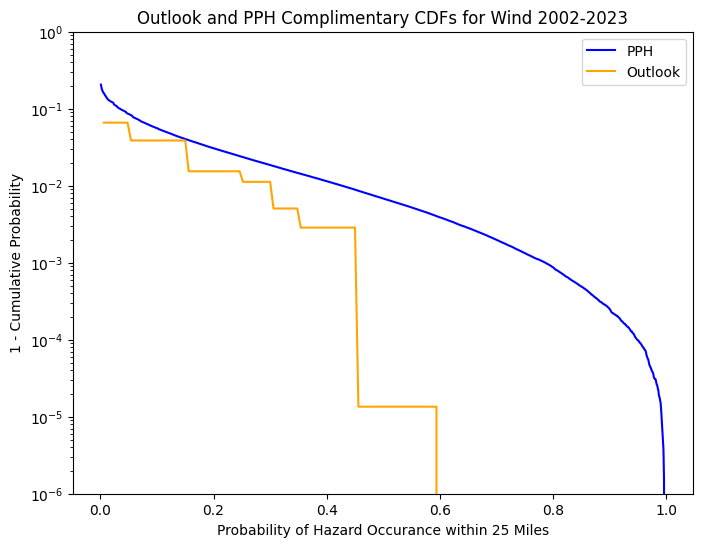

<Figure size 640x480 with 0 Axes>

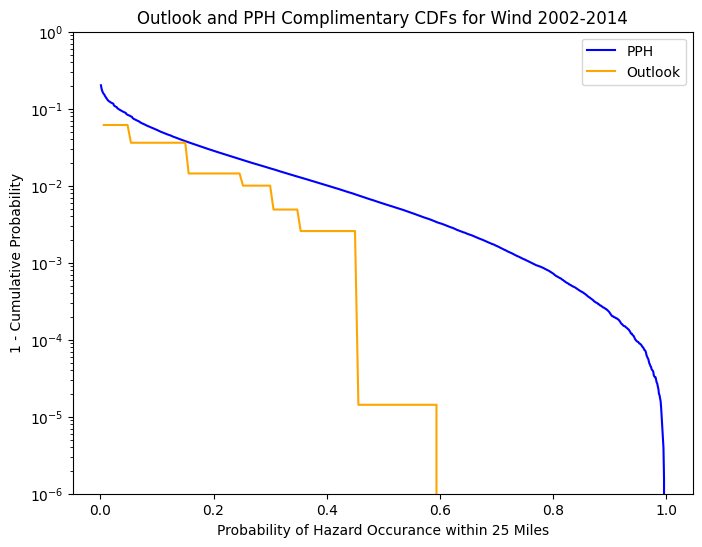

<Figure size 640x480 with 0 Axes>

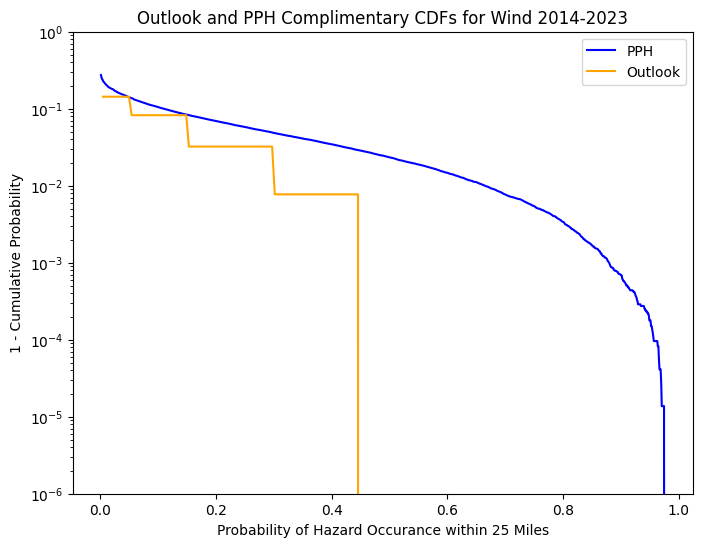

<Figure size 640x480 with 0 Axes>

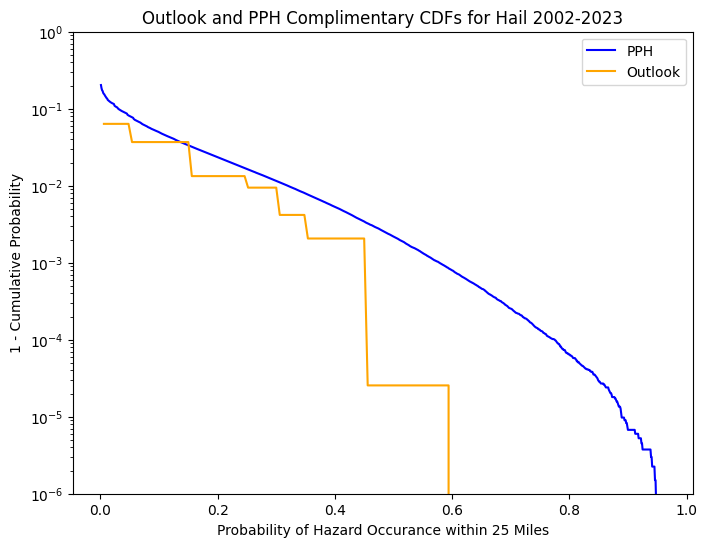

<Figure size 640x480 with 0 Axes>

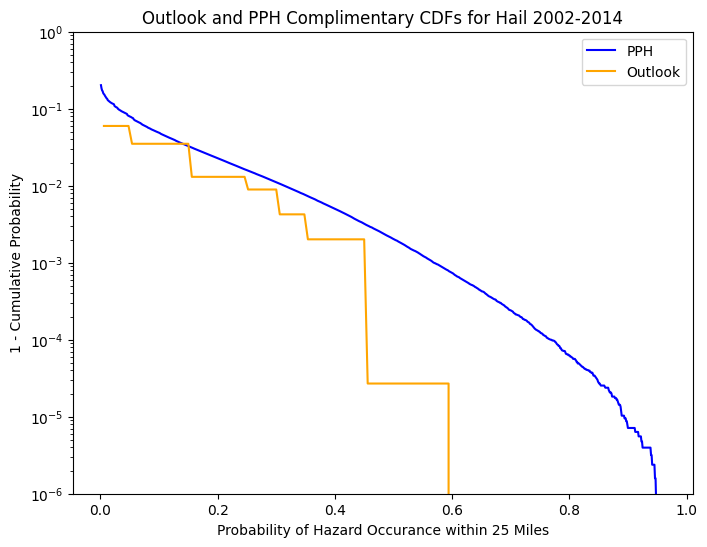

<Figure size 640x480 with 0 Axes>

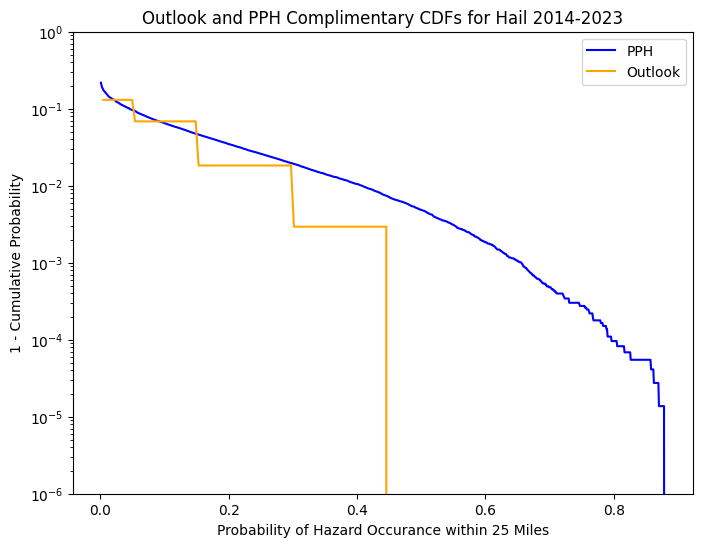

<Figure size 640x480 with 0 Axes>

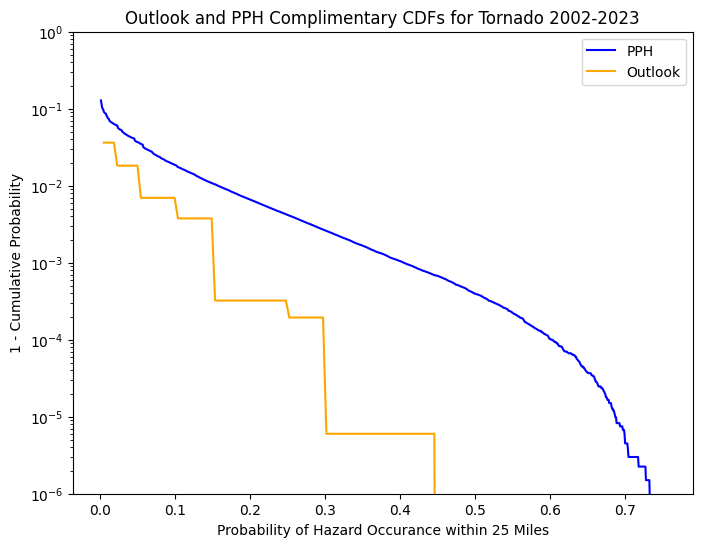

<Figure size 640x480 with 0 Axes>

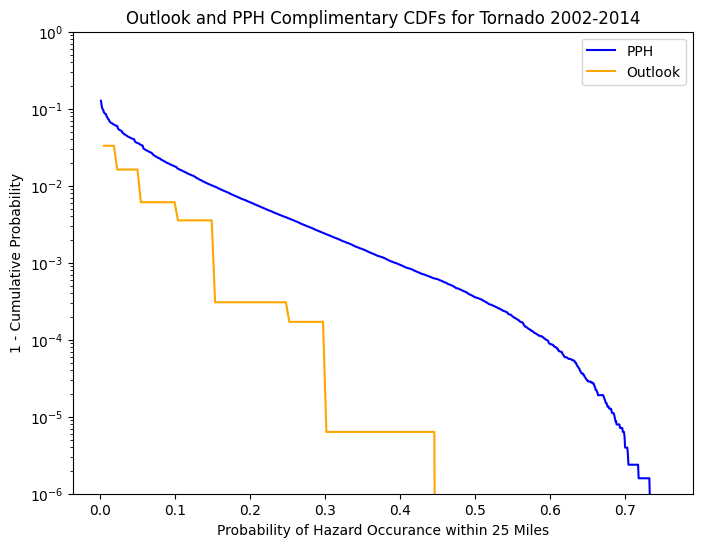

<Figure size 640x480 with 0 Axes>

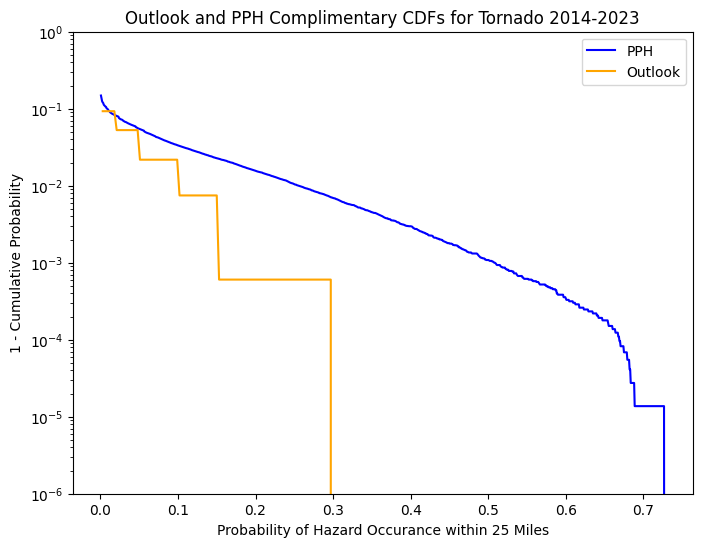

<Figure size 640x480 with 0 Axes>

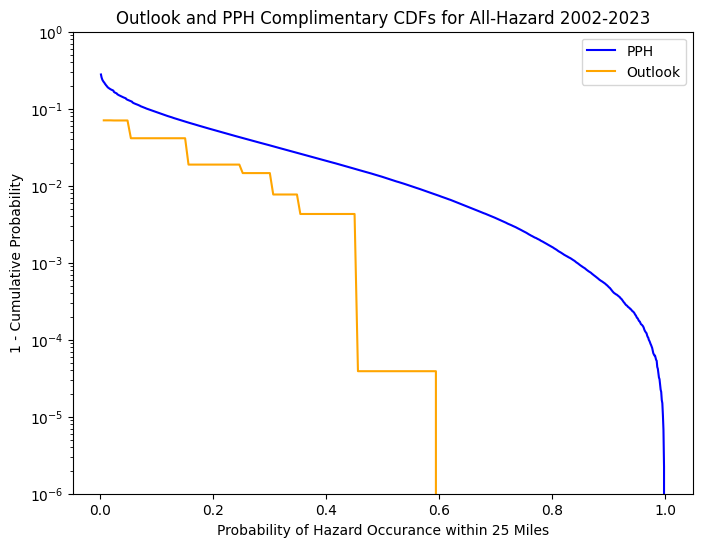

<Figure size 640x480 with 0 Axes>

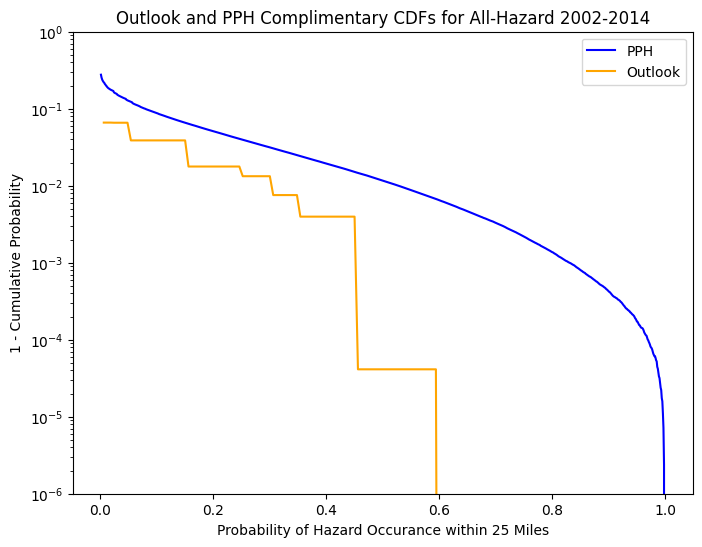

<Figure size 640x480 with 0 Axes>

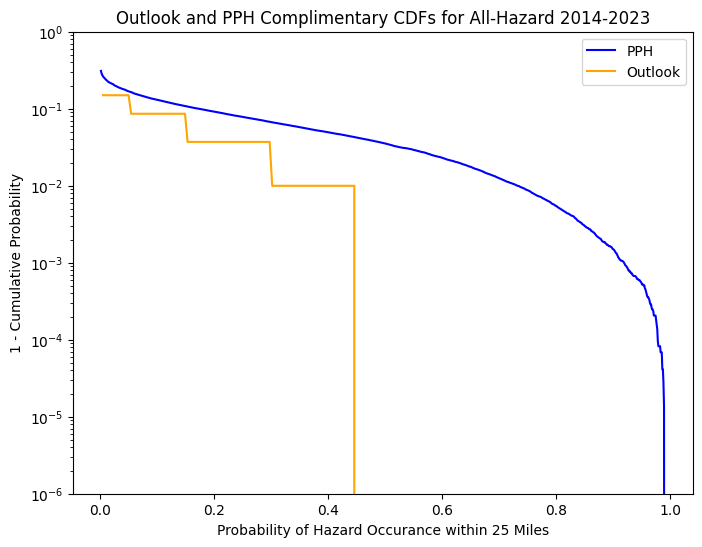

<Figure size 640x480 with 0 Axes>

In [10]:
# CDF of outlook and PPH probabilities for MDT days, pre- and post- time split, and for each hazard type

masks = [(mdt_pph_full_mask, mdt_outlooks_full_mask), (mdt_pph_pre_mask, mdt_outlooks_pre_mask), (mdt_pph_post_mask, mdt_outlooks_post_mask)]
pph_var_dict = {' Wind': 'p_perfect_wind',
                ' Hail': 'p_perfect_hail',
                ' Tornado': 'p_perfect_tor',
                '': 'p_perfect_totalsvr'
                }

for hazard in [' Wind', ' Hail', ' Tornado', '']:
    for i, mask in enumerate(masks):
        this_pph = pph.sel(time = mask[0])[pph_var_dict[hazard]]
        this_outlook = grid_outlooks.sel(time = mask[1], outlook = 'Day 1' + hazard)['prob']

        # Create a boolean mask where conus_mask is a string
        valid_points_mask = np.vectorize(lambda x: isinstance(x, str))(conus_mask)

        # Ensure the mask matches the shape of the data (broadcast along time if needed)
        valid_points_mask = np.expand_dims(valid_points_mask, axis=0)  # Add a time dimension
        valid_points_mask_outlooks = np.broadcast_to(valid_points_mask, this_outlook.shape)  # Match shape
        valid_points_mask_pph = np.broadcast_to(valid_points_mask, this_pph.shape)  # Match shape

        # Filter the flattened data using the mask
        this_outlook_vals = this_outlook.values[valid_points_mask_outlooks].flatten()
        this_pph_vals = this_pph.values[valid_points_mask_pph].flatten()
        #
        plt.figure(figsize=(8, 6))

        counts, bin_edges = np.histogram(this_pph_vals/100, bins=1000, density=True)
        ccdf = 1 - np.cumsum(counts * np.diff(bin_edges))  # Cumulative sum to compute the CDF
        plt.plot(bin_edges[1:], ccdf, label="PPH", color="blue")

        counts, bin_edges = np.histogram(this_outlook_vals, bins=100, density=True)
        ccdf = 1 - np.cumsum(counts * np.diff(bin_edges))  # Cumulative sum to compute the CDF
        plt.plot(bin_edges[1:], ccdf, label="Outlook", color="orange")

        #sns.kdeplot(this_pph.values.flatten()/100, cumulative = True, label="PPH", color="blue")
        #sns.kdeplot(this_outlook_vals, cumulative = True, label="Outlook", color="orange")
        plt.xlabel("Probability of Hazard Occurance within 25 Miles")
        plt.ylabel("1 - Cumulative Probability")
        plt.yscale('log')
        plt.ylim(1e-6, 1)
        if hazard == '':
            haz = ' All-Hazard'
        else: 
            haz = hazard
        if i == 0:
            ds = '2002-2023'
        elif i == 1:
            ds = '2002-2014'
        else:
            ds = '2014-2023'
        plt.title("Outlook and PPH Complimentary CDFs for" + haz + " " + ds)
        plt.legend()
        plt.savefig('plots/results/cdfs/mdt_' + haz.replace(' ', '').replace('-', '') + ds.replace('-', '') + '.pdf')
        plt.show()
        plt.clf()

# Identifying Days with Missing Data

In [ ]:
grid_outlook_location = 'data/outlooks/grid_outlooks.nc'
grid_outlooks = xr.open_dataset(grid_outlook_location)

In [ ]:
max_outlooks = grid_outlooks.max(dim = ['x', 'y'])['prob']

In [ ]:
pph['MAX_CAT'][-300:-150]

In [ ]:
dates = max_outlooks['time']
thresholds = {'': .3,
              ' Tornado': .3,
              ' Wind': .5,
              ' Hail': .5}
days = ['Day 3', 'Day 2 7', 'Day 2 17', 'Day 1']
hazard_days = ['Day 2 7', 'Day 2 17', 'Day 1']
investigate_dates = []
for date in dates:
    max_outlooks_date = max_outlooks.sel(time = date)
    for hazard in ['', ' Tornado', ' Wind', ' Hail']:
        if hazard == '':
            this_days = days
        else:
            this_days = hazard_days
        outlook_keys = [item + hazard for item in this_days]
        max_prob = max_outlooks_date.sel(outlook = outlook_keys).max()
        if max_prob >= thresholds[hazard]:
            for outlook_key in outlook_keys:
                if max_outlooks_date.sel(outlook = outlook_key) == 0 and outlook_key == 'Day 1':
                    print(str(date.data) + ' ' + str(outlook_key))
                    investigate_dates.append(str(date.data))

                

print(investigate_dates)

In [ ]:
str(date.data)

# OLD NON-GENERALIZED PLOTTING OF RAMPS / SCRATCH WORK

Investigate: old ramp ups by 5? Why lots of 5 and not 4? And none region, make sure no PPH.

In [ ]:
#test = outlooks[outlooks['REGION'] != 'NONE']
#test[test['DATE'] <= '199203160000']

In [ ]:
#test_outlooks = outlooks[outlooks['MAX_CAT'] == 'SLGT']
#test_outlooks = test_outlooks[test_outlooks['RAMP_UP'] == 3]
#set(test_outlooks['DATE'])

In [ ]:
#outlooks[outlooks['DATE'] == '200208030000']

In [ ]:
#plot_day('201010100000', outlooks, pph, reports)

In [ ]:
def plot_ramps(pph, title_insert=''):
    # 2d histogram of ramps
    # NOT FOR USE
    ramp_up_bins = [-.5, .5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]
    ramp_up_amounts = [0, 1, 2, 3, 4, 5, 6]
    ramp_down_amounts = [-6, -5, -4, -3, -2, -1, 0]
    ramp_down_bins = [-6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -.5, .5]
    heatmap = np.histogram2d(np.array(pph['RAMP_UP'][pph['RAMP_UP']!= 'NONE'], dtype=int), np.array(pph['RAMP_DOWN'][pph['RAMP_UP']!= 'NONE'], dtype=int), bins = (ramp_up_bins, ramp_down_bins))
    im = plt.imshow(heatmap[0],  norm=colors.LogNorm())
    plt.colorbar(im)
    bins = len(ramp_up_bins)
    for i in range(bins-1): 
        for j in range(bins-1): 
            plt.annotate(str(int(heatmap[0][i][j])), xy=(j, i), 
                        ha='center', va='center', color='black') 

    plt.xticks(ramp_up_amounts, labels=ramp_down_amounts)
    plt.yticks(ramp_up_amounts, labels=ramp_up_amounts)
    plt.xlabel("Ramp Down")
    plt.ylabel("Ramp Up")
    plt.title("Number of " + title_insert + "Days with each Ramp Up and Ramp Down Amount")
    plt.show()

In [ ]:
str(mdt_pph['time'].values).replace('\n ', ' ').replace(' ', ', ')

In [ ]:
mdt_new_pph['time'].where(mdt_new_pph['MAX_CAT'] == 'HIGH')
